# Back Propogation

## Importing Modules and dataset

In [68]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [69]:
data = load_iris()
x=data.data
y=data.target

In [70]:
y = pd.get_dummies(y).values

In [71]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=2)

## Defining functions

### * Sigmoid
### * Mean Squared Error
### * Accuracy

In [72]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

## Backtracking

### Model Architecture
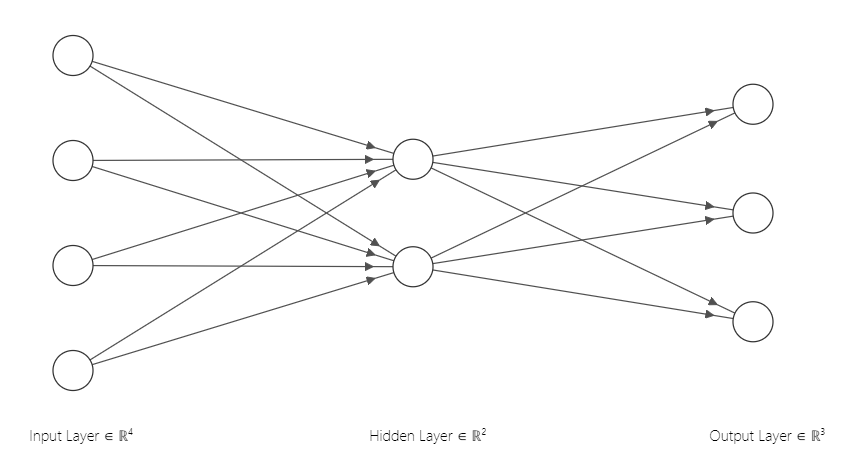

### Implementation

In [88]:
learning_rate = 0.1
iterations = 1000
N = ytrain.size

inp = 4
h1 = 2 
out = 3  

results = pd.DataFrame(columns=["mse", "accuracy"])

np.random.seed(10)

W1 = np.random.normal(scale=0.5, size=(inp,h1))   
W2 = np.random.normal(scale=0.5, size=(h1,out)) 
print(W1)
print()
print(W2)
for itr in range(iterations):    
    
    Z1 = np.dot(xtrain, W1)
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    mse = mean_squared_error(A2, ytrain)
    acc = accuracy(A2, ytrain)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    E1 = A2 - ytrain
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(xtrain.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

[[ 0.66579325  0.35763949]
 [-0.77270015 -0.00419192]
 [ 0.31066799 -0.36004278]
 [ 0.13275579  0.05427426]]

[[ 0.00214572 -0.08730011  0.21651309]
 [ 0.60151869 -0.48253284  0.51413704]]


C:\Users\prash\AppData\Local\Temp\ipykernel_21344\3995616140.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\prash\AppData\Local\Temp\ipykernel_21344\3995616140.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\prash\AppData\Local\Temp\ipykernel_21344\3995616140.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\prash\AppData\Local\Temp\ipykernel_21344\3995616140.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

In [89]:
print(W1)
print()
print(W2)

[[ 0.48209141  0.32933499]
 [-0.95950816  0.30992566]
 [ 0.39360082 -0.97797787]
 [ 0.18411275 -0.18698128]]

[[-1.11200215 -0.33586052 -0.29284077]
 [ 1.02128419 -0.8127469  -0.30068395]]


<AxesSubplot:title={'center':'Mean Squared Error'}>

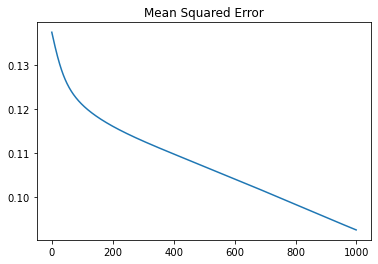

In [74]:
results.mse.plot(title="Mean Squared Error")

<AxesSubplot:title={'center':'Accuracy'}>

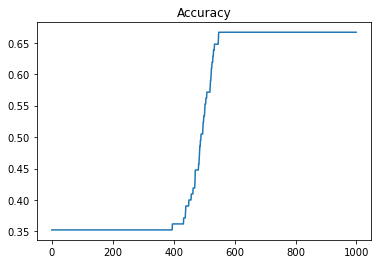

In [75]:
results.accuracy.plot(title="Accuracy")

In [76]:
Z1 = np.dot(xtest, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, ytest)
print("Accuracy: {}".format(acc))

Accuracy: 0.6666666666666666


### Model Architecture
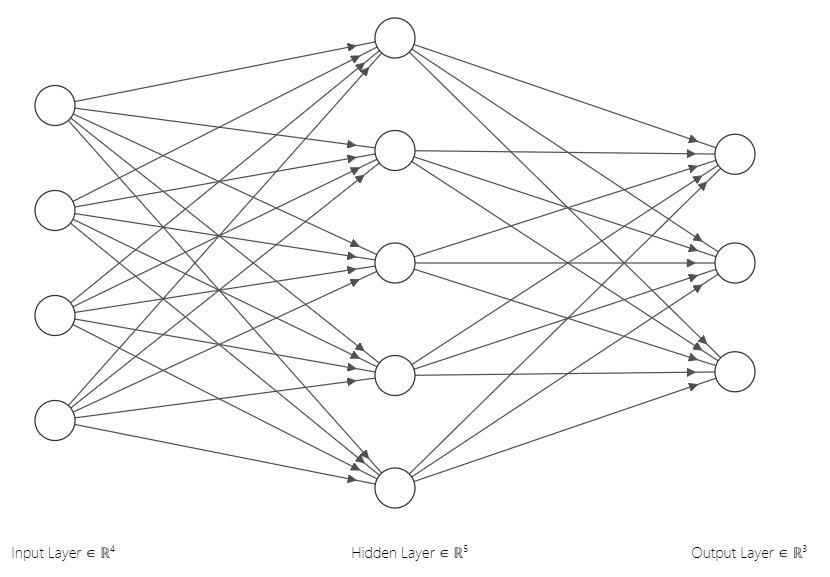

### Implementation

In [81]:
learning_rate = 0.25
iterations = 1000
N = ytrain.size

inp = 4
h1 = 5
out = 3  

results = pd.DataFrame(columns=["mse", "accuracy"])

np.random.seed(10)

W1 = np.random.normal(scale=0.5, size=(inp,h1))   
W2 = np.random.normal(scale=0.5, size=(h1,out)) 

print(W1)
print()
print(W2)

for itr in range(iterations):    
    
    Z1 = np.dot(xtrain, W1)
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    mse = mean_squared_error(A2, ytrain)
    acc = accuracy(A2, ytrain)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    E1 = A2 - ytrain
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(xtrain.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

C:\Users\prash\AppData\Local\Temp\ipykernel_21344\2173784921.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\prash\AppData\Local\Temp\ipykernel_21344\2173784921.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\prash\AppData\Local\Temp\ipykernel_21344\2173784921.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\prash\AppData\Local\Temp\ipykernel_21344\2173784921.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

In [ ]:
print(W1)
print()
print(W2)

<AxesSubplot:title={'center':'Mean Squared Error'}>

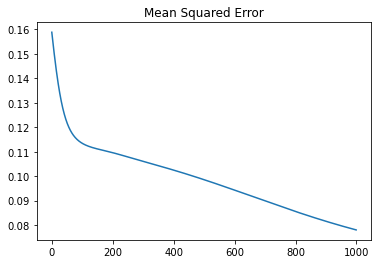

In [82]:
results.mse.plot(title="Mean Squared Error")

<AxesSubplot:title={'center':'Accuracy'}>

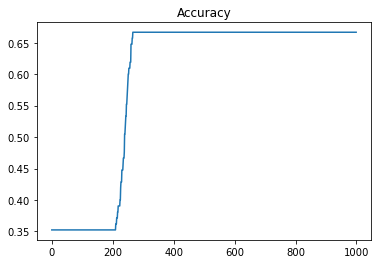

In [83]:
results.accuracy.plot(title="Accuracy")

In [84]:
Z1 = np.dot(xtest, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, ytest)
print("Accuracy: {}".format(acc))

Accuracy: 0.6666666666666666


### Model Architecture
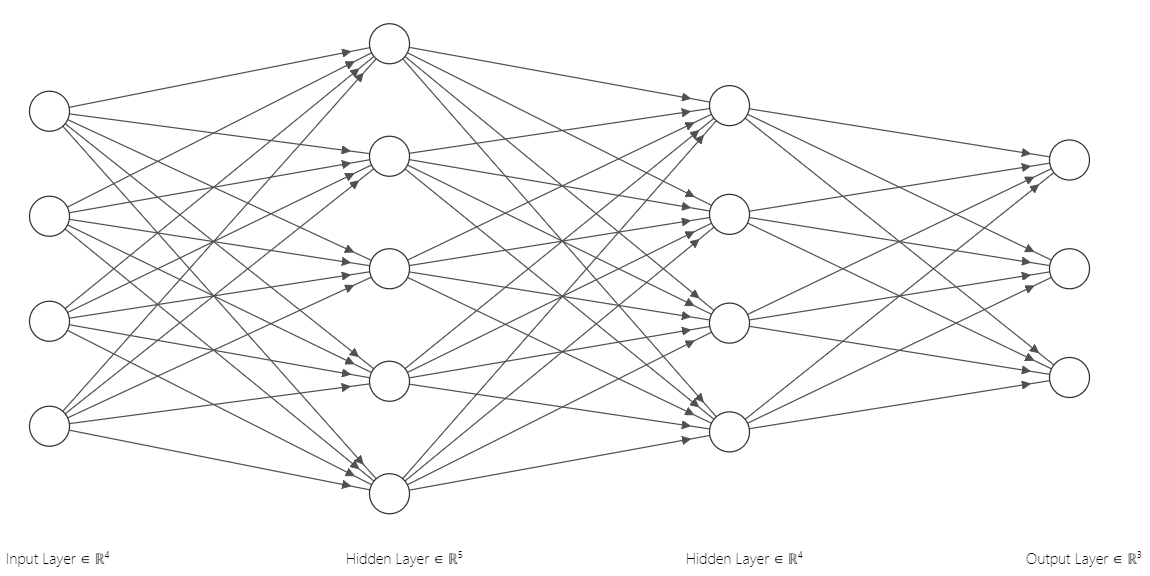

### Implementation

In [98]:
learning_rate = 0.15
iterations = 2000
N = ytrain.size

inp = 4
h1 = 5
h2 = 4
out = 3  

results = pd.DataFrame(columns=["mse", "accuracy"])

np.random.seed(10)

W1 = np.random.normal(scale=0.5, size=(inp,h1))   
W2 = np.random.normal(scale=0.5, size=(h1,h2)) 
W3 = np.random.normal(scale=0.5, size=(h2,out)) 

print(W1)
print()
print(W2)
print()
print(W3)

for itr in range(iterations):    
    
    Z1 = np.dot(xtrain, W1)
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    Z3 = np.dot(A2, W3)
    A3 = sigmoid(Z3)
    
    mse = mean_squared_error(A3, ytrain)
    acc = accuracy(A3, ytrain)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    E1 = A3 - ytrain
    dW1 = E1 * A3 * (1 - A3)

    E2 = np.dot(dW1, W3.T)
    dW2 = E2 * A2 * (1 - A2)
    
    E3 = np.dot(dW2, W2.T)
    dW3 = E3 * A1 * (1 - A1)

    W3_update = np.dot(A2.T, dW1) / N
    W2_update = np.dot(A1.T, dW2) / N
    W1_update = np.dot(xtrain.T, dW3) / N
    
    W3 = W3 - learning_rate * W3_update
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

[[ 0.66579325  0.35763949 -0.77270015 -0.00419192  0.31066799]
 [-0.36004278  0.13275579  0.05427426  0.00214572 -0.08730011]
 [ 0.21651309  0.60151869 -0.48253284  0.51413704  0.11431507]
 [ 0.22256881 -0.56830111  0.06756844  0.7422685  -0.53990244]]

[[-0.98886414 -0.87168615  0.13303508  1.19248367]
 [ 0.56184563  0.83631111  0.04957461  0.69899819]
 [-0.13562399  0.30660209 -0.13365859 -0.27465451]
 [ 0.06635415 -0.23807101  0.65423654  0.09750664]
 [ 0.20010499 -0.16881617  0.62823613 -0.36598475]]

[[ 0.33011578 -0.17543595 -0.46971668]
 [-0.24466861 -0.40229557 -0.10634882]
 [-0.16957012  0.15608497  0.28257633]
 [-0.07371013 -0.01295267  0.1445471 ]]


C:\Users\prash\AppData\Local\Temp\ipykernel_21344\3547294700.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\prash\AppData\Local\Temp\ipykernel_21344\3547294700.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\prash\AppData\Local\Temp\ipykernel_21344\3547294700.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\prash\AppData\Local\Temp\ipykernel_21344\3547294700.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

In [99]:
print(W1)
print()
print(W2)
print()
print(W3)

[[ 0.12927867  0.43996511 -0.76640244 -0.30355038  0.26707815]
 [-0.9704783   0.19518733  0.05887309 -0.28205403 -0.10395102]
 [ 0.61432651  0.61297263 -0.48115754  0.59230515  0.05972511]
 [ 0.44505628 -0.56959036  0.06770261  0.79865747 -0.56460181]]

[[-1.35147833 -0.92643551  0.28136952  1.27781748]
 [ 0.60573872  0.89815027 -0.04243705  0.61838197]
 [-0.12326045  0.30974522 -0.14029608 -0.27840189]
 [-0.37992968 -0.29954184  0.83591483  0.19107486]
 [ 0.27853416 -0.1131639   0.54058252 -0.43634737]]

[[ 0.72417572 -0.48297595 -1.00064492]
 [ 0.0861698  -0.68812728 -0.57518945]
 [-0.71692106  0.02423437  0.18676217]
 [-0.71826777 -0.14218532  0.07674326]]


<AxesSubplot:title={'center':'Mean Squared Error'}>

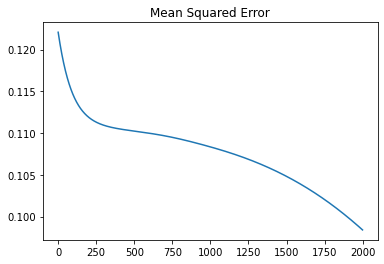

In [100]:
results.mse.plot(title="Mean Squared Error")

<AxesSubplot:title={'center':'Accuracy'}>

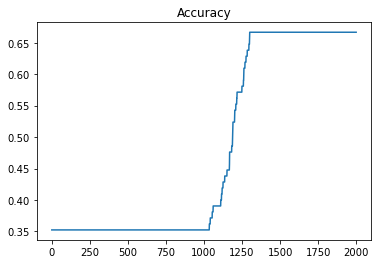

In [101]:
results.accuracy.plot(title="Accuracy")

In [104]:
Z1 = np.dot(xtest, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

Z3 = np.dot(A2, W3)
A3 = sigmoid(Z3)

acc = accuracy(A3, ytest)
print("Accuracy: {}".format(acc))

Accuracy: 0.6666666666666666


### Model Architecture
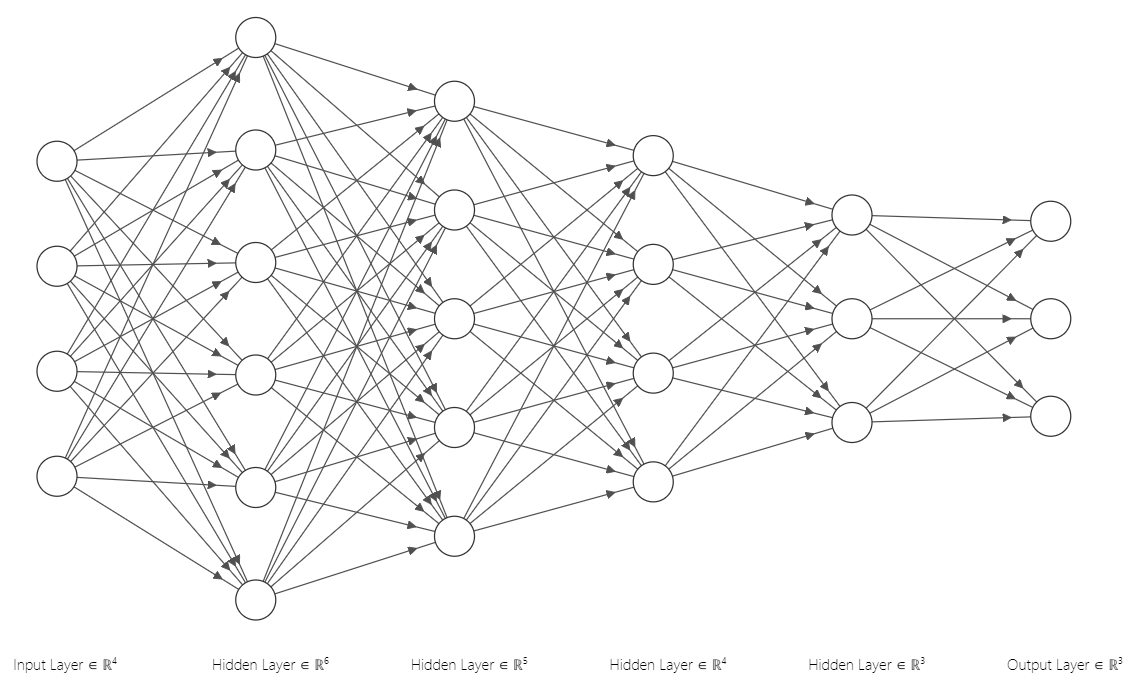

### Implementation

In [119]:
learning_rate = 0.15
iterations = 2000
N = ytrain.size

inp = 4
h1 = 6
h2 = 5
h3 = 4
h4 = 3
out = 3  

results = pd.DataFrame(columns=["mse", "accuracy"])

np.random.seed(10)

W1 = np.random.normal(scale=0.5, size=(inp,h1))   
W2 = np.random.normal(scale=0.5, size=(h1,h2)) 
W3 = np.random.normal(scale=0.5, size=(h2,h3)) 
W4 = np.random.normal(scale=0.5, size=(h3,h4)) 
W5 = np.random.normal(scale=0.5, size=(h4,out)) 

print(W1)
print()
print(W2)
print()
print(W3)
print()
print(W4)
print()
print(W5)

for itr in range(iterations):    
    
    Z1 = np.dot(xtrain, W1)
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    Z3 = np.dot(A2, W3)
    A3 = sigmoid(Z3)
    
    Z4 = np.dot(A3, W4)
    A4 = sigmoid(Z4)
    
    Z5 = np.dot(A4, W5)
    A5 = sigmoid(Z5)
    
    mse = mean_squared_error(A5, ytrain)
    acc = accuracy(A5, ytrain)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    E1 = A5 - ytrain
    dW1 = E1 * A5 * (1 - A5)

    E2 = np.dot(dW1, W5.T)
    dW2 = E2 * A4 * (1 - A4)
    
    E3 = np.dot(dW2, W4.T)
    dW3 = E3 * A3 * (1 - A3)
    
    E4 = np.dot(dW3, W3.T)
    dW4 = E4 * A2 * (1 - A2)
    
    E5 = np.dot(dW4, W2.T)
    dW5 = E5 * A1 * (1 - A1)

    W5_update = np.dot(A4.T, dW1) / N
    W4_update = np.dot(A3.T, dW2) / N
    W3_update = np.dot(A2.T, dW3) / N
    W2_update = np.dot(A1.T, dW4) / N
    W1_update = np.dot(xtrain.T, dW5) / N
    
    
    W5 = W5 - learning_rate * W5_update
    W4 = W4 - learning_rate * W4_update
    W3 = W3 - learning_rate * W3_update
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

[[ 0.66579325  0.35763949 -0.77270015 -0.00419192  0.31066799 -0.36004278]
 [ 0.13275579  0.05427426  0.00214572 -0.08730011  0.21651309  0.60151869]
 [-0.48253284  0.51413704  0.11431507  0.22256881 -0.56830111  0.06756844]
 [ 0.7422685  -0.53990244 -0.98886414 -0.87168615  0.13303508  1.19248367]]

[[ 0.56184563  0.83631111  0.04957461  0.69899819 -0.13562399]
 [ 0.30660209 -0.13365859 -0.27465451  0.06635415 -0.23807101]
 [ 0.65423654  0.09750664  0.20010499 -0.16881617  0.62823613]
 [-0.36598475  0.33011578 -0.17543595 -0.46971668 -0.24466861]
 [-0.40229557 -0.10634882 -0.16957012  0.15608497  0.28257633]
 [-0.07371013 -0.01295267  0.1445471  -0.26993954  0.35408001]]

[[ 0.42111237  0.1017904   1.19735183  0.45872947]
 [-0.05613624 -0.18109022 -0.11609113 -0.25086445]
 [ 0.56439258 -0.34890502 -0.04056109 -0.26464804]
 [ 0.52309143 -0.70927801 -0.18124959 -0.06095285]
 [ 0.15967821  0.23045145 -0.10789495  0.49453623]]

[[ 0.15737689  1.23382553 -0.75416074]
 [ 0.31030033 -0.52256

C:\Users\prash\AppData\Local\Temp\ipykernel_21344\3684341813.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\prash\AppData\Local\Temp\ipykernel_21344\3684341813.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\prash\AppData\Local\Temp\ipykernel_21344\3684341813.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\prash\AppData\Local\Temp\ipykernel_21344\3684341813.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

<AxesSubplot:title={'center':'Mean Squared Error'}>

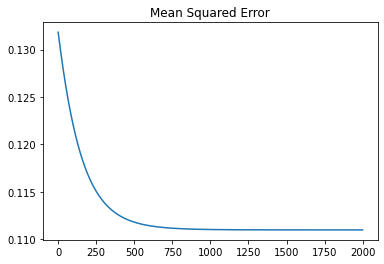

In [120]:
results.mse.plot(title="Mean Squared Error")

<AxesSubplot:title={'center':'Accuracy'}>

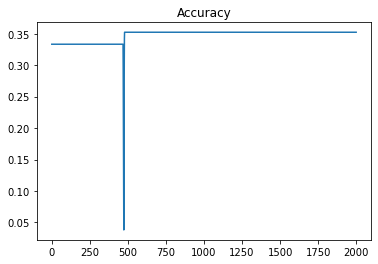

In [121]:
results.accuracy.plot(title="Accuracy")

In [122]:
Z1 = np.dot(xtest, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

Z3 = np.dot(A2, W3)
A3 = sigmoid(Z3)

acc = accuracy(A3, ytest)
print("Accuracy: {}".format(acc))

Accuracy: 0.37777777777777777
